In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from scipy import ndimage

## a)

In [2]:
# Define distance function
def distance(x,y):
    x = np.array(x)
    y = np.array(y)
    return np.linalg.norm(x-y)

# Intialize as a matrix of zeros
im = np.zeros((256,256,3))
radius = 25

# Color the image based on distance from the circle centers
for i in range(256):
    for j in range(256):
        if(distance([i,j], [120,60]) < radius):
            im[i,j] = [1,0,0] # red
        if(distance([i,j], [180,60]) < radius):
            im[i,j] = [0,1,0] # green

        if(distance([i,j], [60,120]) < radius):
            im[i,j] = [1,1,0] # yellow
        if(distance([i,j], [120,120]) < radius):
            im[i,j] = [0,0,1] # blue
        if(distance([i,j], [180,120]) < radius):
            im[i,j] = [1,0,1] # magenta
        
        if(distance([i,j], [60,180]) < radius):
            im[i,j] = [0,1,1] # cyan
        if(distance([i,j], [120,180]) < radius):
            im[i,j] = [1,1,1] # white

# Convert to HSV
im_hsi = cv2.cvtColor(np.float32(im), cv2.COLOR_RGB2HSV)

# Select Hue
h = im_hsi[:,:,0]

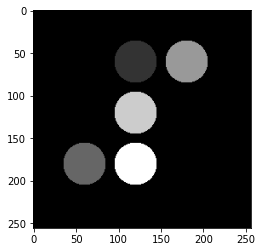

In [3]:
# Display Hue image
plt.imshow(h, 'gray')
plt.show()

In [4]:
# Add salt and pepper noise
h_noisy = h
for i in range(200): # 200 pixels
        # Random location
        x=random.randint(0,255)
        y=random.randint(0,255)

        # Random intensity
        intensity = random.randint(0,255)
        h_noisy[x,y] = intensity 


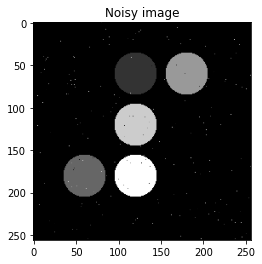

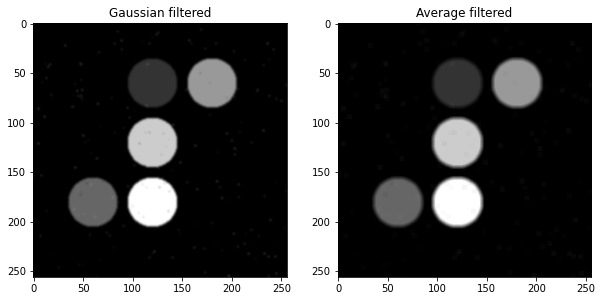

In [5]:
plt.imshow(h_noisy, "gray")
plt.title("Noisy image")
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
h_gaussian = cv2.GaussianBlur(h, (5,5), 0) # Gaussian filter
plt.imshow(h_gaussian, 'gray')
plt.title("Gaussian filtered")

plt.subplot(1,2,2)
h_average = ndimage.uniform_filter(h, (5,5)) # Average filter
plt.imshow(h_average, 'gray')
plt.title("Average filtered")
plt.show()

Average filter is better at removing the noise but induces more blur compared to the Gaussian filter. Gaussian filtering doesn't remove all noise, but it reduces the intensity of noise, and the overall image is sharper and the edges are better preserved.

## b) Edge detection

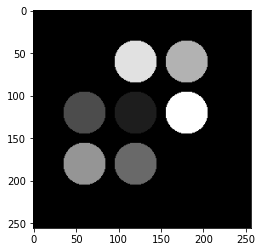

In [6]:
im_gray = cv2.cvtColor(np.float32(im), cv2.COLOR_RGB2GRAY) # Convert to gray
im_gray = (im_gray*255).astype(np.uint8) # Scale to 0-255
plt.imshow(im_gray, 'gray')
plt.show()

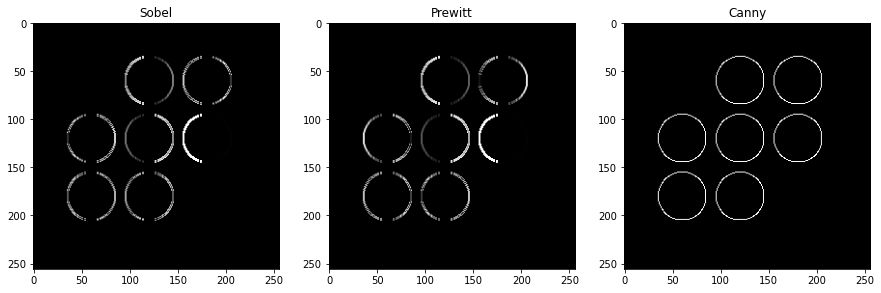

In [7]:
# Apply the three kernels
im_sobel = ndimage.sobel(im_gray) # Sobel
im_prewitt = ndimage.prewitt(im_gray) # Prewitt
im_canny = cv2.Canny(im_gray,threshold1=50,threshold2=100) # Canny, with the lower and upper threshold values

# Display the three images
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.imshow(im_sobel, 'gray')
plt.title("Sobel")

plt.subplot(1,3,2)
plt.imshow(im_prewitt, 'gray')
plt.title("Prewitt")

plt.subplot(1,3,3)
plt.imshow(im_canny, 'gray')
plt.title("Canny")
plt.show()

Canny gives the best result as it uses a more sophisticated method for finding the edges compared to Sobel and Prewitt methods. It uses a Gaussian filter, finds the intensity gradient, performs non-maximal suppression and hysterisis thresholding using the two threshold values provided. This results in generating strong and accurate edges.

To improve other edge detectors, prior gaussian filtering and selecting of edges based on thresolding can be performed. 